# EDA

In [24]:
import numpy as np
import pandas as pd
from geopy.distance import geodesic
import matplotlib.pyplot as plt
import os

places_df = {}
train_data_df = pd.read_csv('train.csv')
#places = ['sg-commerical-centres.csv', 'sg-gov-markets-hawker-centres.csv', 'sg-primary-schools.csv', 'sg-secondary-schools.csv', 'sg-shopping-malls.csv', 'sg-train-stations.csv']
#for place in places:
#    place_name = place.split('.')[0]
#    places_df[place_name] = pd.read_csv(place)

#for name, df in places_df.items():
#    new_name = name.split('-')[1] + '_df'
#    print(new_name)
#    globals()[new_name] = df

# commerical_df; gov_df; primary_df; secondary_df; shopping_df; train_df



##  visualisation for train_data_df

### Unique answers

In [ ]:
all = len(train_data_df)
attributes = ['town', 'month', 'flat_type', 'block', 'street_name', 'storey_range', 'floor_area_sqm', 'flat_model', 'eco_category', 'lease_commence_date','elevation', 'subzone', 'planning_area', 'region']
for attribute in attributes:
    unique = 'unique_' + attribute
    globals()[unique] = len(train_data_df[attribute].unique())
    print(attribute + ': ' + str(globals()[unique]) + '/ '+ str(all))

town: 26/ 431732
month: 251/ 431732
flat_type: 12/ 431732
block: 2472/ 431732
street_name: 1103/ 431732
storey_range: 25/ 431732
floor_area_sqm: 187/ 431732
flat_model: 20/ 431732
eco_category: 1/ 431732
lease_commence_date: 54/ 431732
elevation: 1/ 431732
subzone: 155/ 431732
planning_area: 32/ 431732
region: 5/ 431732


**Firstly, **

<font color='blue'>
Not consider block (too many), stree_name (too many), eco_category (only one), elevation (only one), latitude (distance), longitude (distance), resale_price.
</font>

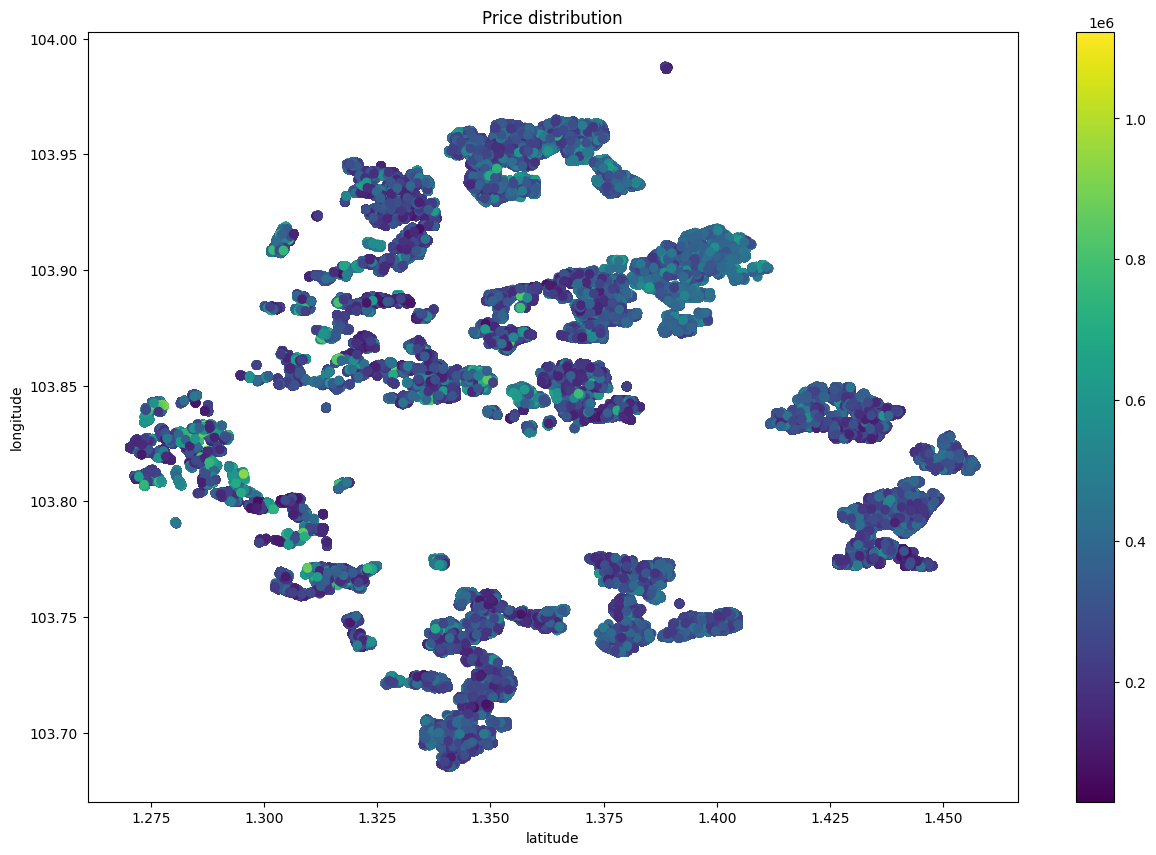

In [ ]:

def visual_train_data():
    plt.figure(figsize=(15, 10))
    plt.scatter(train_data_df['latitude'], train_data_df['longitude'], c=train_data_df['resale_price'], cmap='viridis')
    plt.colorbar()
    plt.xlabel('latitude')
    plt.ylabel('longitude')
    plt.title('Price distribution')
    plt.savefig('visual_train_data_latlng.png')
    plt.show()

visual_train_data()

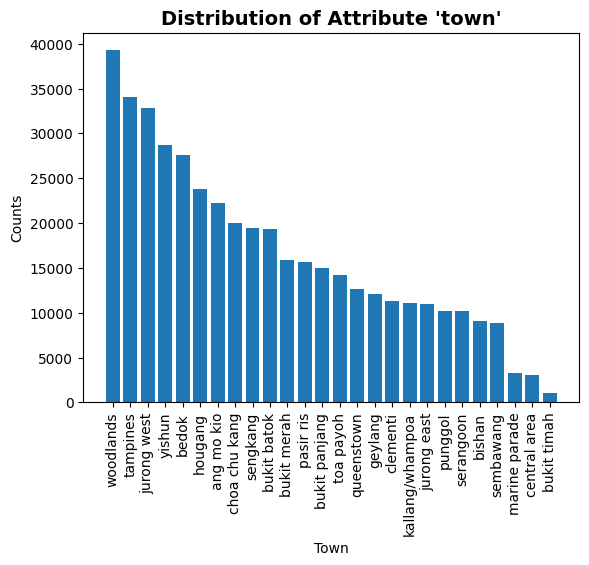

<Figure size 640x480 with 0 Axes>

In [ ]:
train_data_df['town'] = train_data_df['town'].str.lower()
counts = train_data_df['town'].value_counts()
counts = counts.reset_index()
counts.columns = ['town', 'counts']
fig, ax = plt.subplots() 
plt.bar(counts.town, counts.counts)
plt.xticks(rotation=90)
ax.set_xlabel('Town') 
ax.set_ylabel('Counts') 
ax.set_title('Distribution of Attribute \'town\'', fontsize = 14, fontweight ='bold') 
plt.show()
plt.savefig('visual_train_town.png')

<ipython-input-40-27461c03860d>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels, rotation=90)


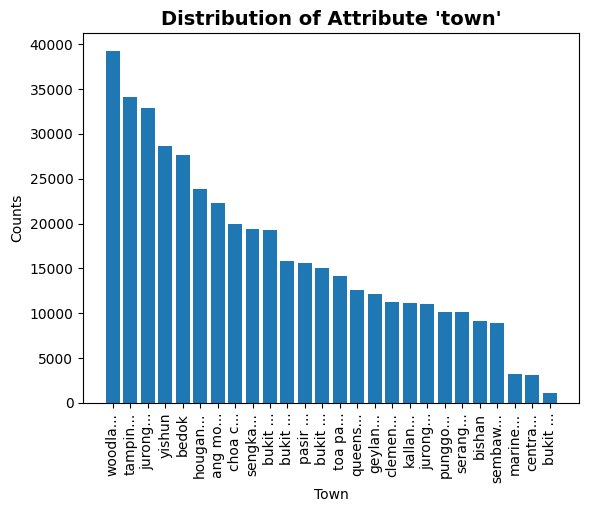

<Figure size 640x480 with 0 Axes>

In [40]:
train_data_df['town'] = train_data_df['town'].str.lower()
counts = train_data_df['town'].value_counts()
counts = counts.reset_index()
counts.columns = ['town', 'counts']
fig, ax = plt.subplots() 
plt.bar(counts.town, counts.counts)
plt.xticks(rotation=90)
ax.set_xlabel('Town') 
ax.set_ylabel('Counts') 
ax.set_title('Distribution of Attribute \'town\'', fontsize=14, fontweight='bold')
# Set maximum length of x-label names to be 6 characters
labels = [label[:6] + '...' if len(label) > 6 else label for label in counts.town]
ax.set_xticklabels(labels, rotation=90)
plt.show()
plt.savefig('visual_train_town.png')

<ipython-input-14-ddb12ab69da4>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(x_labels_short, rotation=90, ha='center')


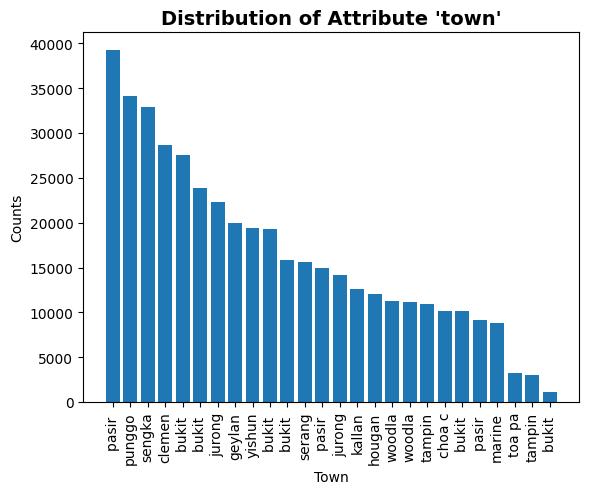

<Figure size 640x480 with 0 Axes>

In [14]:
train_data_df['town'] = train_data_df['town'].str.lower()
counts = train_data_df['town'].value_counts()
counts = counts.reset_index()
counts.columns = ['town', 'counts']
fig, ax = plt.subplots() 
plt.bar(counts.town, counts.counts)
plt.xticks(rotation=90)
ax.set_xlabel('Town') 
ax.set_ylabel('Counts') 
ax.set_title('Distribution of Attribute \'town\'', fontsize = 14, fontweight ='bold') 

x_labels_short = [label[:6] for label in train_data_df['town']]
plt.gca().set_xticklabels(x_labels_short, rotation=90, ha='center')

plt.show()
plt.savefig('visual_train_town.png')

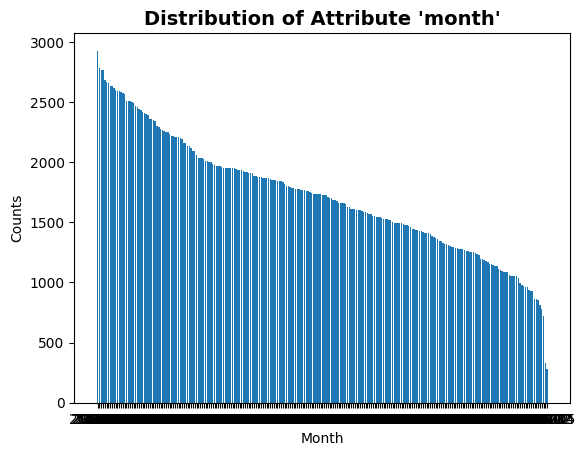

<Figure size 640x480 with 0 Axes>

In [ ]:
counts = train_data_df['month'].value_counts()
counts.sort_index()
counts = counts.reset_index()
counts.columns = ['month', 'counts']
import matplotlib.pyplot as plt
fig, ax = plt.subplots() 
plt.bar(counts.month, counts.counts)
ax.set_xlabel('Month') 
ax.set_ylabel('Counts') 
ax.set_title('Distribution of Attribute \'month\'', fontsize = 14, fontweight ='bold') 
plt.show()
plt.savefig('visual_train_month.png')

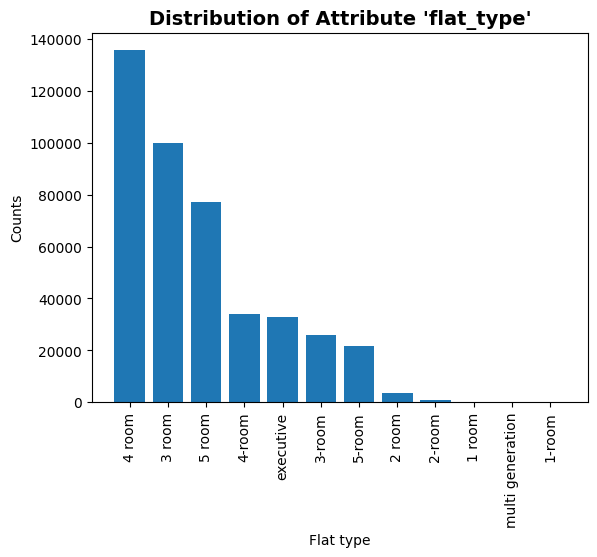

<Figure size 640x480 with 0 Axes>

In [48]:
train_data_df['flat_type'] = train_data_df['flat_type'].str.lower()
counts = train_data_df['flat_type'].value_counts()
counts = counts.reset_index()
counts.columns = ['flat_type', 'counts']
fig, ax = plt.subplots() 
plt.bar(counts.flat_type, counts.counts)
plt.xticks(rotation=90)

ax.set_xlabel('Flat type') 
ax.set_ylabel('Counts') 
ax.set_title('Distribution of Attribute \'flat_type\'', fontsize = 14, fontweight ='bold') 


plt.show()
plt.savefig('visual_train_flatType.png')

<ipython-input-49-55cbfa943999>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels, rotation=90)


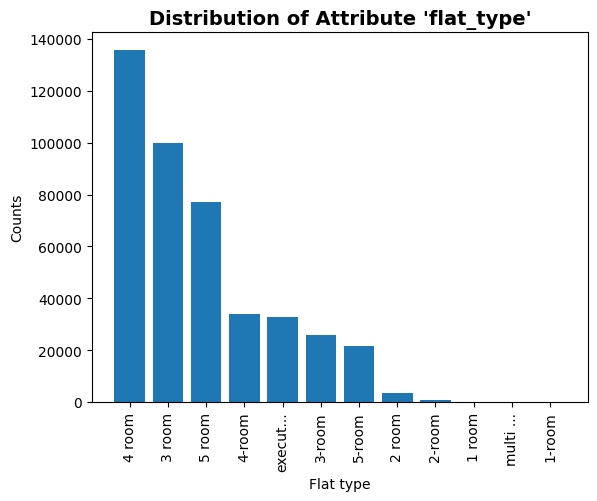

<Figure size 640x480 with 0 Axes>

In [49]:
train_data_df['flat_type'] = train_data_df['flat_type'].str.lower()
counts = train_data_df['flat_type'].value_counts()
counts = counts.reset_index()
counts.columns = ['flat_type', 'counts']
fig, ax = plt.subplots() 
plt.bar(counts.flat_type, counts.counts)
plt.xticks(rotation=90)
ax.set_xlabel('Flat type') 
ax.set_ylabel('Counts') 
ax.set_title('Distribution of Attribute \'flat_type\'', fontsize=14, fontweight='bold')
# Set maximum length of x-label names to be 6 characters
labels = [label[:6] + '...' if len(label) > 6 else label for label in counts.flat_type]
ax.set_xticklabels(labels, rotation=90)
plt.show()
plt.savefig('visual_train_flatType.png')


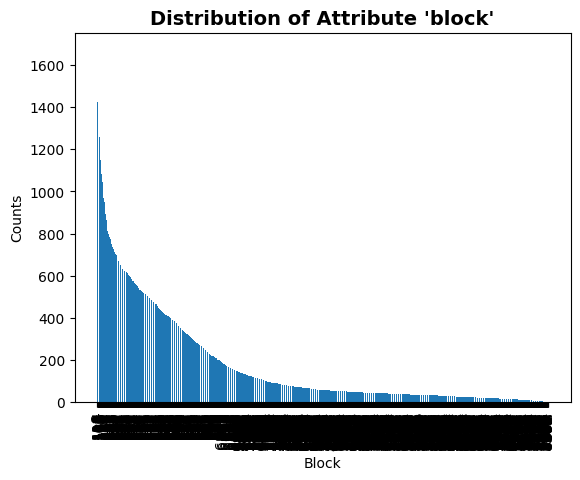

In [ ]:
#too many
counts = train_data_df['block'].value_counts()
counts = counts.reset_index()
counts.columns = ['block', 'counts']
fig, ax = plt.subplots() 
plt.bar(counts.block, counts.counts)
plt.xticks(rotation=90)
ax.set_xlabel('Block') 
ax.set_ylabel('Counts') 
ax.set_title('Distribution of Attribute \'block\'', fontsize = 14, fontweight ='bold') 
plt.show()
plt.savefig('visual_train_block.png')

### Top 20 block

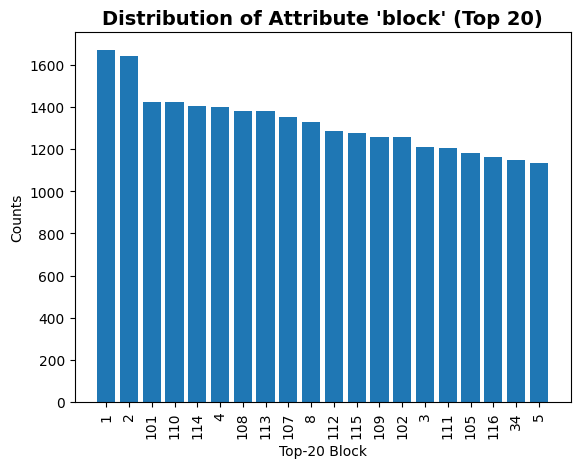

<Figure size 640x480 with 0 Axes>

In [15]:
counts = train_data_df['block'].value_counts()
counts = counts.reset_index()
counts.columns = ['block', 'counts']
top_20_block = counts.iloc[:20]
fig, ax = plt.subplots() 
plt.bar(top_20_block.block, top_20_block.counts)
plt.xticks(rotation=90)
ax.set_xlabel('Top-20 Block') 
ax.set_ylabel('Counts') 
ax.set_title('Distribution of Attribute \'block\' (Top 20)', fontsize = 14, fontweight ='bold') 
plt.show()
plt.savefig('visual_train_20block.png')

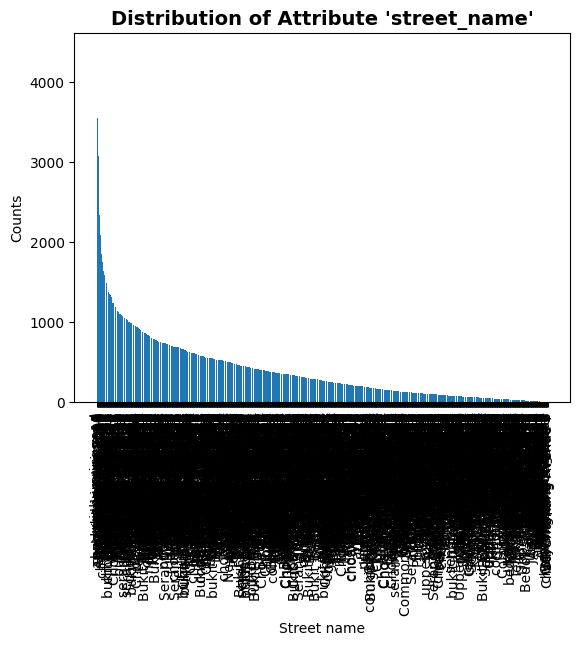

<Figure size 640x480 with 0 Axes>

In [ ]:
#too many
counts = train_data_df['street_name'].value_counts()
counts = counts.reset_index()
counts.columns = ['street_name', 'counts']
fig, ax = plt.subplots() 
plt.bar(counts.street_name, counts.counts)
plt.xticks(rotation=90)
ax.set_xlabel('Street name') 
ax.set_ylabel('Counts') 
ax.set_title('Distribution of Attribute \'street_name\'', fontsize = 14, fontweight ='bold') 
plt.show()
plt.savefig('visual_train_streetName.png')

### top 20 street name

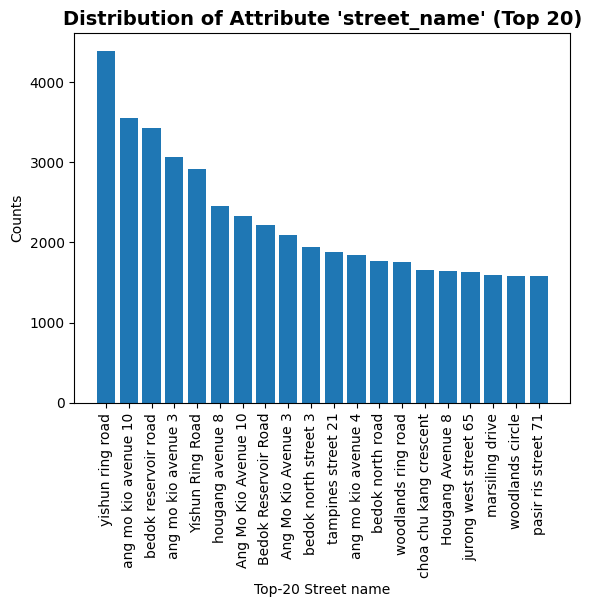

<Figure size 640x480 with 0 Axes>

In [37]:
counts = train_data_df['street_name'].value_counts()
counts = counts.reset_index()
counts.columns = ['street_name', 'counts']
top_20_street = counts.iloc[:20]
fig, ax = plt.subplots() 
plt.bar(top_20_street.street_name, top_20_street.counts)
plt.xticks(rotation=90)
ax.set_xlabel('Top-20 Street name') 
ax.set_ylabel('Counts') 
ax.set_title('Distribution of Attribute \'street_name\' (Top 20)', fontsize = 14, fontweight ='bold') 

#hort = [label[:8] for label in train_data_df['street_name']]
#plt.gca().set_xticklabels(x_labels_short, rotation=90, ha='center')


plt.show()
plt.savefig('visual_train_20streetName.png')

<ipython-input-41-06dd74101dbc>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels, rotation=90)


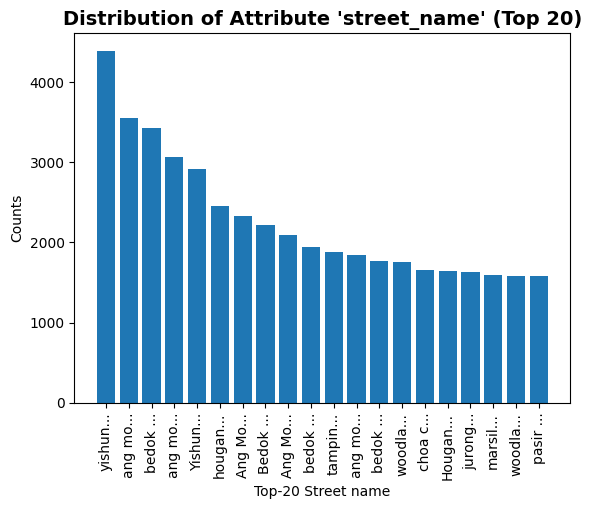

<Figure size 640x480 with 0 Axes>

In [41]:
counts = train_data_df['street_name'].value_counts()
counts = counts.reset_index()
counts.columns = ['street_name', 'counts']
top_20_street = counts.iloc[:20]
fig, ax = plt.subplots() 
plt.bar(top_20_street.street_name, top_20_street.counts)
plt.xticks(rotation=90)
ax.set_xlabel('Top-20 Street name') 
ax.set_ylabel('Counts') 
ax.set_title('Distribution of Attribute \'street_name\' (Top 20)', fontsize=14, fontweight='bold')
# Set maximum length of x-label names to be 6 characters
labels = [label[:6] + '...' if len(label) > 6 else label for label in top_20_street.street_name]
ax.set_xticklabels(labels, rotation=90)
plt.show()
plt.savefig('visual_train_20streetName.png')

### storey range

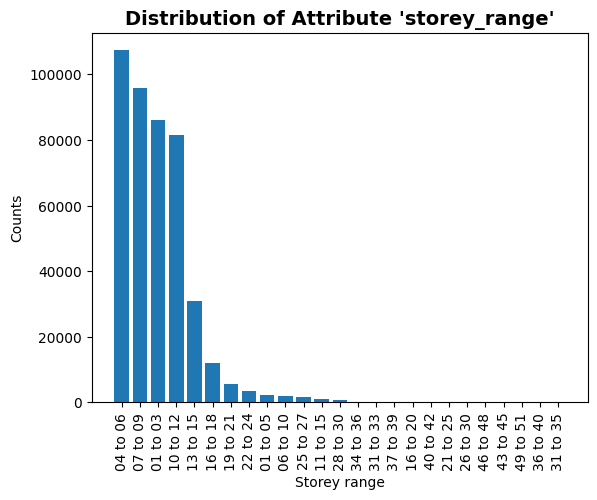

<Figure size 640x480 with 0 Axes>

In [ ]:
counts = train_data_df['storey_range'].value_counts()
counts = counts.reset_index()
counts.columns = ['storey_range', 'counts']
fig, ax = plt.subplots() 
plt.bar(counts.storey_range, counts.counts)
plt.xticks(rotation=90)
ax.set_xlabel('Storey range') 
ax.set_ylabel('Counts') 
ax.set_title('Distribution of Attribute \'storey_range\'', fontsize = 14, fontweight ='bold') 
plt.show()
plt.savefig('visual_train_storeyRange.png')

### floor area sqm

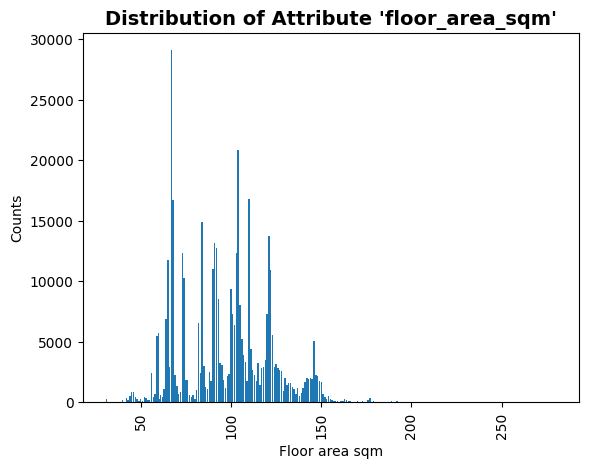

<Figure size 640x480 with 0 Axes>

In [ ]:

counts = train_data_df['floor_area_sqm'].value_counts()
counts = counts.reset_index()
counts.columns = ['floor_area_sqm', 'counts']
fig, ax = plt.subplots() 
plt.bar(counts.floor_area_sqm, counts.counts)
plt.xticks(rotation=90)
ax.set_xlabel('Floor area sqm') 
ax.set_ylabel('Counts') 
ax.set_title('Distribution of Attribute \'floor_area_sqm\'', fontsize = 14, fontweight ='bold') 
plt.show()
plt.savefig('visual_train_floorAreaSqm.png')

### flat model

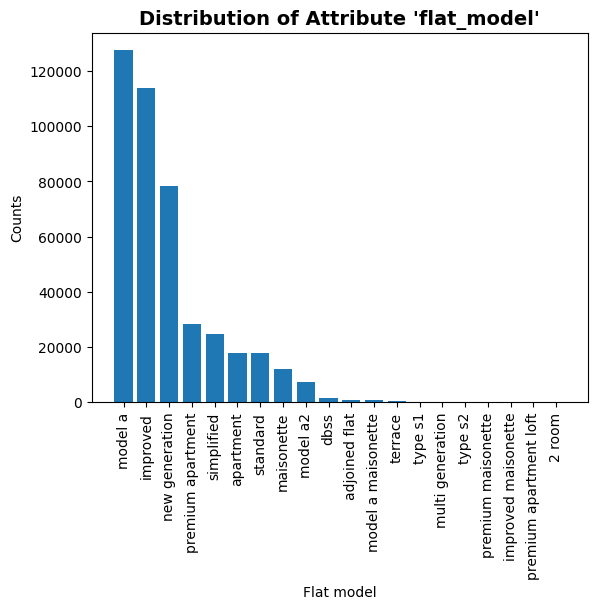

<Figure size 640x480 with 0 Axes>

In [35]:

counts = train_data_df['flat_model'].value_counts()
counts = counts.reset_index()
counts.columns = ['flat_model', 'counts']
fig, ax = plt.subplots() 




plt.bar(counts.flat_model, counts.counts)
plt.xticks(rotation=90)

ax.set_xlabel('Flat model') 
ax.set_ylabel('Counts') 
ax.set_title('Distribution of Attribute \'flat_model\'', fontsize = 14, fontweight ='bold') 



plt.show()
plt.savefig('visual_train_flatModel.png')

<ipython-input-42-6b969959df45>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels, rotation=90)


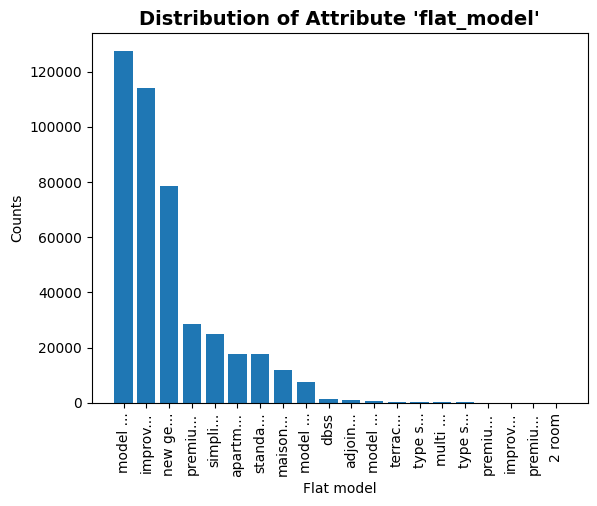

<Figure size 640x480 with 0 Axes>

In [42]:
counts = train_data_df['flat_model'].value_counts()
counts = counts.reset_index()
counts.columns = ['flat_model', 'counts']
fig, ax = plt.subplots() 
plt.bar(counts.flat_model, counts.counts)
plt.xticks(rotation=90)
ax.set_xlabel('Flat model') 
ax.set_ylabel('Counts') 
ax.set_title('Distribution of Attribute \'flat_model\'', fontsize=14, fontweight='bold')
# Set maximum length of x-label names to be 6 characters
labels = [label[:6] + '...' if len(label) > 6 else label for label in counts.flat_model]
ax.set_xticklabels(labels, rotation=90)
plt.show()
plt.savefig('visual_train_flatModel.png')


In [ ]:
#eco category with only one parameter

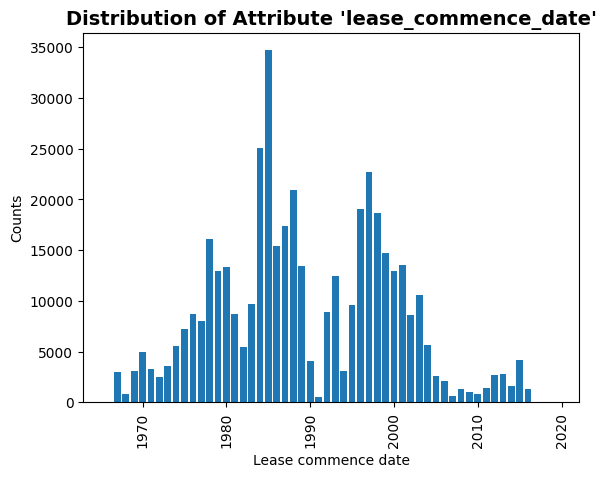

<Figure size 640x480 with 0 Axes>

In [ ]:
counts = train_data_df['lease_commence_date'].value_counts()
counts = counts.reset_index()
counts.columns = ['lease_commence_date', 'counts']
fig, ax = plt.subplots() 
plt.bar(counts.lease_commence_date, counts.counts)
plt.xticks(rotation=90)
ax.set_xlabel('Lease commence date') 
ax.set_ylabel('Counts') 
ax.set_title('Distribution of Attribute \'lease_commence_date\'', fontsize = 14, fontweight ='bold') 
plt.show()
plt.savefig('visual_train_leaseCommenceDate.png')

In [ ]:
counts = train_data_df['lease_commence_date'].value_counts()
counts = counts.reset_index()
counts.columns = ['lease_commence_date', 'counts']
fig, ax = plt.subplots() 
plt.bar(counts.lease_commence_date, counts.counts)
plt.xticks(rotation=90)
ax.set_xlabel('Lease commence date') 
ax.set_ylabel('Counts') 
ax.set_title('Distribution of Attribute \'lease_commence_date\'', fontsize = 14, fontweight ='bold') 
plt.show()
plt.savefig('visual_train_leaseCommenceDate.png')

In [ ]:
#elevation with only one

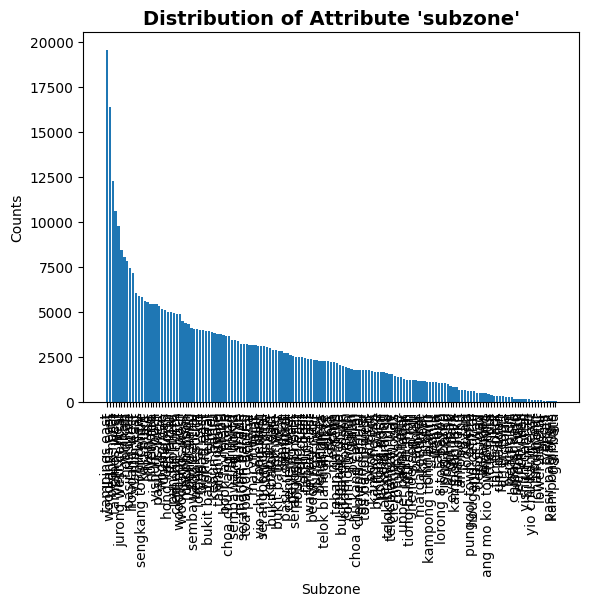

<Figure size 640x480 with 0 Axes>

In [ ]:

counts = train_data_df['subzone'].value_counts()
counts = counts.reset_index()
counts.columns = ['subzone', 'counts']
fig, ax = plt.subplots() 
plt.bar(counts.subzone, counts.counts)
plt.xticks(rotation=90)
ax.set_xlabel('Subzone') 
ax.set_ylabel('Counts') 
ax.set_title('Distribution of Attribute \'subzone\'', fontsize = 14, fontweight ='bold') 
plt.show()
plt.savefig('visual_train_subzone.png')

### Top 20 subzone

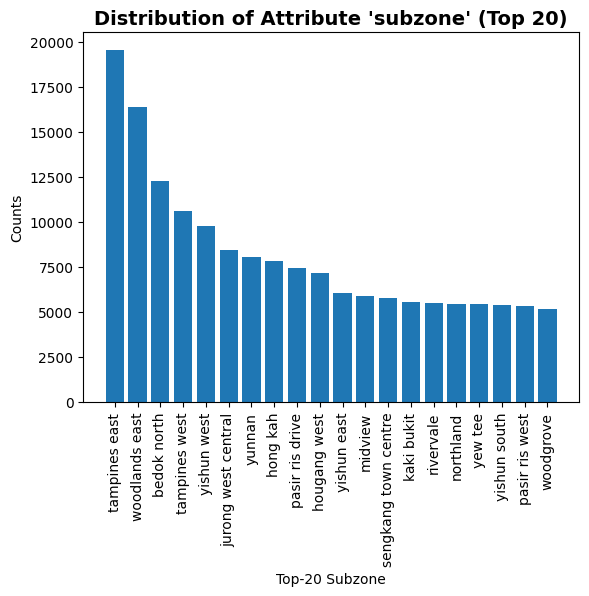

<Figure size 640x480 with 0 Axes>

In [16]:
counts = train_data_df['subzone'].value_counts()
counts = counts.reset_index()
counts.columns = ['subzone', 'counts']
top_20_subzones = counts.iloc[:20]
fig, ax = plt.subplots() 
plt.bar(top_20_subzones.subzone, top_20_subzones.counts)
plt.xticks(rotation=90)
ax.set_xlabel('Top-20 Subzone') 
ax.set_ylabel('Counts') 
ax.set_title('Distribution of Attribute \'subzone\' (Top 20)', fontsize = 14, fontweight ='bold') 
plt.show()
plt.savefig('visual_train_20subzone.png')

<ipython-input-43-de7e0bc7f421>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels, rotation=90)


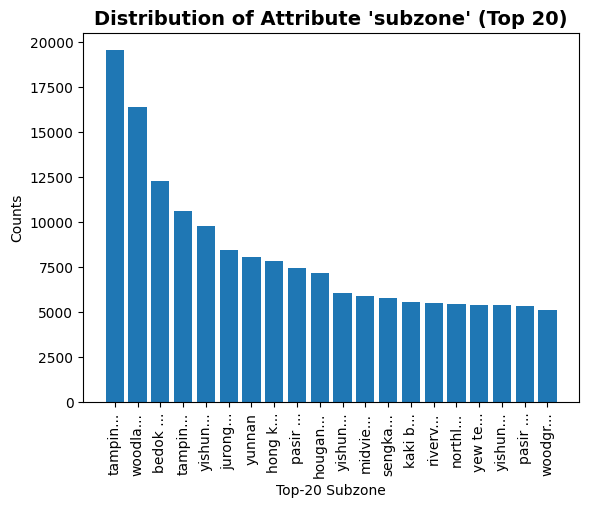

<Figure size 640x480 with 0 Axes>

In [43]:
# For subzone plot
counts = train_data_df['subzone'].value_counts()
counts = counts.reset_index()
counts.columns = ['subzone', 'counts']
top_20_subzones = counts.iloc[:20]
fig, ax = plt.subplots() 
plt.bar(top_20_subzones.subzone, top_20_subzones.counts)
plt.xticks(rotation=90)
ax.set_xlabel('Top-20 Subzone') 
ax.set_ylabel('Counts') 
ax.set_title('Distribution of Attribute \'subzone\' (Top 20)', fontsize = 14, fontweight ='bold') 
# Set maximum length of x-label names to be 6 characters
labels = [label[:6] + '...' if len(label) > 6 else label for label in top_20_subzones.subzone]
ax.set_xticklabels(labels, rotation=90)
plt.show()
plt.savefig('visual_train_20subzone.png')

### planning area

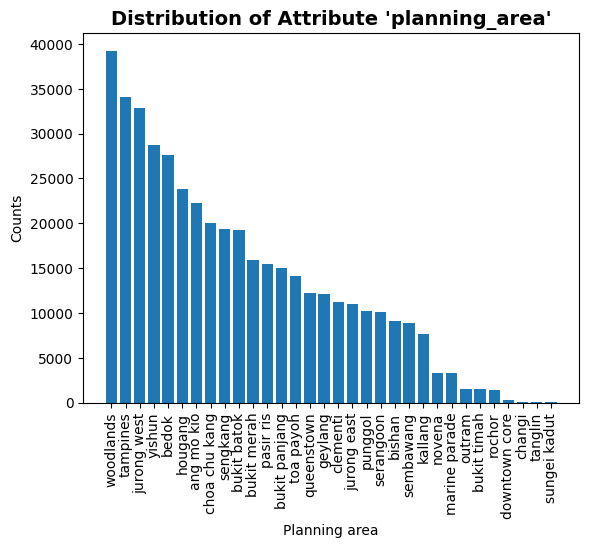

<Figure size 640x480 with 0 Axes>

In [ ]:

counts = train_data_df['planning_area'].value_counts()
counts = counts.reset_index()
counts.columns = ['planning_area', 'counts']
fig, ax = plt.subplots() 
plt.bar(counts.planning_area, counts.counts)
plt.xticks(rotation=90)
ax.set_xlabel('Planning area') 
ax.set_ylabel('Counts') 
ax.set_title('Distribution of Attribute \'planning_area\'', fontsize = 14, fontweight ='bold') 
plt.show()
plt.savefig('visual_train_planningArea.png')

<ipython-input-50-8c3d1a26567c>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels, rotation=90)


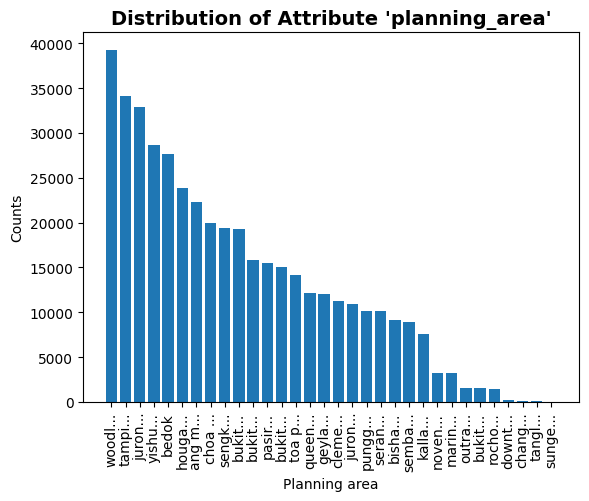

<Figure size 640x480 with 0 Axes>

In [50]:
counts = train_data_df['planning_area'].value_counts()
counts = counts.reset_index()
counts.columns = ['planning_area', 'counts']
fig, ax = plt.subplots() 
plt.bar(counts.planning_area, counts.counts)
plt.xticks(rotation=90)
ax.set_xlabel('Planning area') 
ax.set_ylabel('Counts') 
ax.set_title('Distribution of Attribute \'planning_area\'', fontsize=14, fontweight='bold')
labels = [label[:5] + '...' if len(label) > 5 else label for label in counts.planning_area]
ax.set_xticklabels(labels, rotation=90)
plt.show()
plt.savefig('visual_train_planningArea.png')


### region

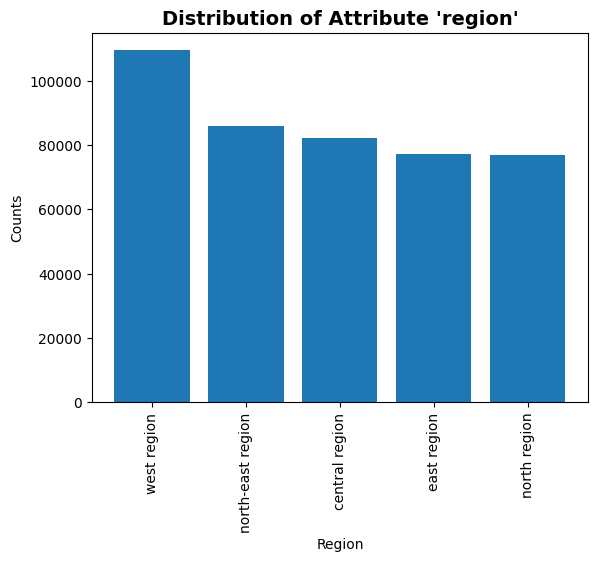

<Figure size 640x480 with 0 Axes>

In [ ]:

counts = train_data_df['region'].value_counts()
counts = counts.reset_index()
counts.columns = ['region', 'counts']
fig, ax = plt.subplots() 
plt.bar(counts.region, counts.counts)
plt.xticks(rotation=90)
ax.set_xlabel('Region') 
ax.set_ylabel('Counts') 
ax.set_title('Distribution of Attribute \'region\'', fontsize = 14, fontweight ='bold') 
plt.show()
plt.savefig('visual_train_region.png')

<ipython-input-46-367df73bc9d3>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels, rotation=90)


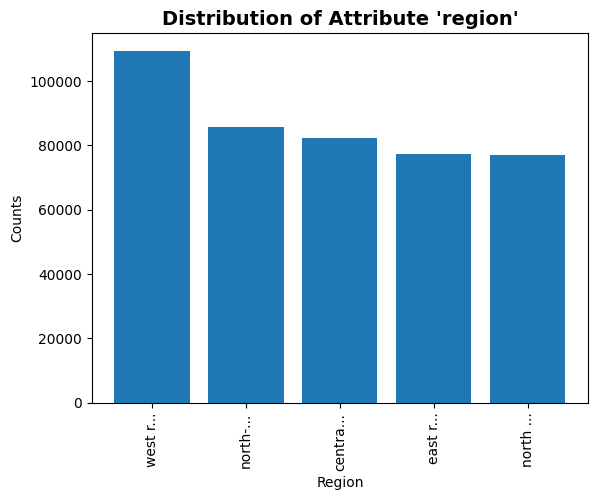

<Figure size 640x480 with 0 Axes>

In [46]:
counts = train_data_df['region'].value_counts()
counts = counts.reset_index()
counts.columns = ['region', 'counts']
fig, ax = plt.subplots() 
plt.bar(counts.region, counts.counts)
plt.xticks(rotation=90)
ax.set_xlabel('Region') 
ax.set_ylabel('Counts') 
ax.set_title('Distribution of Attribute \'region\'', fontsize = 14, fontweight ='bold') 

# Set maximum length of x-label names to be 10 characters
labels = [label[:6] + '...' if len(label) > 6 else label for label in counts.region]
ax.set_xticklabels(labels, rotation=90)

plt.show()
plt.savefig('visual_train_region.png')


## Missing values check

In [ ]:
cols_with_missing = train_data_df.columns[train_data_df.isnull().any()].tolist()
if(cols_with_missing):
  print(cols_with_missing)
else:
  print('No missing values')

No missing values


## Attribute type check

In [ ]:
print(train_data_df.dtypes)

month                   object
town                    object
flat_type               object
block                   object
street_name             object
storey_range            object
floor_area_sqm         float64
flat_model              object
eco_category            object
lease_commence_date      int64
latitude               float64
longitude              float64
elevation              float64
subzone                 object
planning_area           object
region                  object
resale_price           float64
dtype: object


# Auxiliary plot

In [4]:
import numpy as np
import pandas as pd
from geopy.distance import geodesic
import matplotlib.pyplot as plt
import os
places = ['sg-commerical-centres.csv', 'sg-gov-markets-hawker-centres.csv', 'sg-primary-schools.csv', 'sg-secondary-schools.csv', 'sg-shopping-malls.csv', 'sg-train-stations.csv']
places_df = {}
# assign place_name to each dataFrame in a dictionary
for place in places:
    place_name = place.split('.')[0]
    places_df[place_name] = pd.read_csv('/content/'+place)

# convert dictionary to DataFrame format with a new name
for name, df in places_df.items():
    new_name = name.split('-')[1] + '_df'
    print(new_name)
    globals()[new_name] = df

commerical_df
gov_df
primary_df
secondary_df
shopping_df
train_df


## sg-commerical-centres

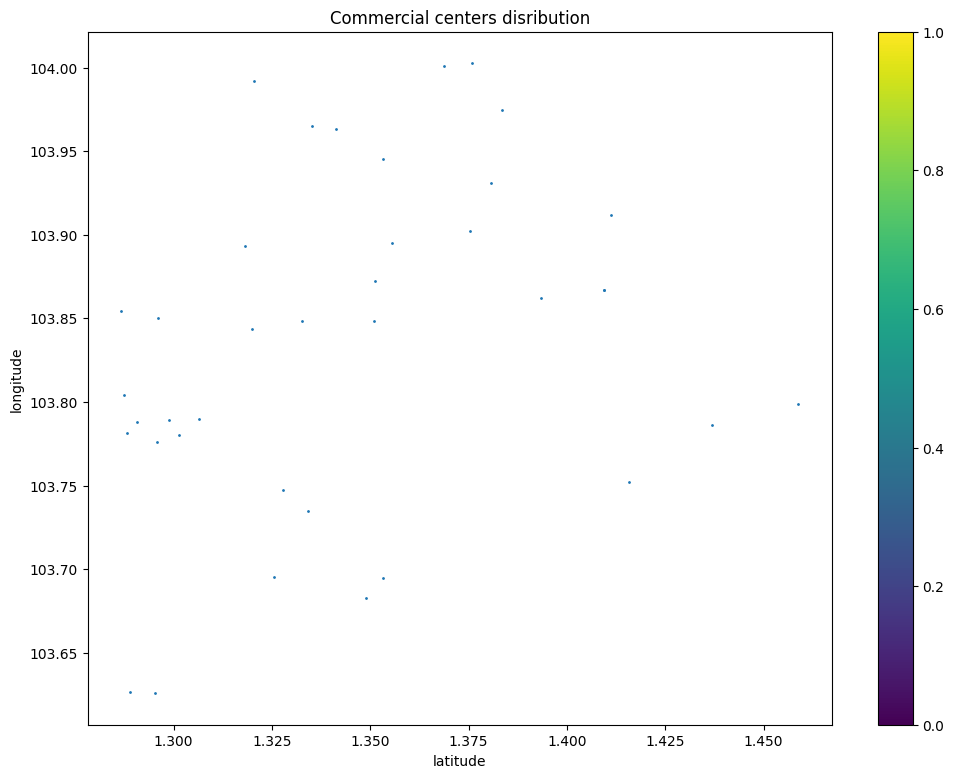

In [15]:
#plt.figure(figsize=(15, 10))
fig, ax = plt.subplots(figsize=(12, 9))
plt.scatter(commerical_df['lat'], commerical_df['lng'], s=1)
plt.colorbar()
plt.xlabel('latitude')
plt.ylabel('longitude')
plt.title('Commercial centers disribution')
plt.savefig('visual_commercial_latlng.png')
plt.show()

## sg-gov-markets-hawker-centres

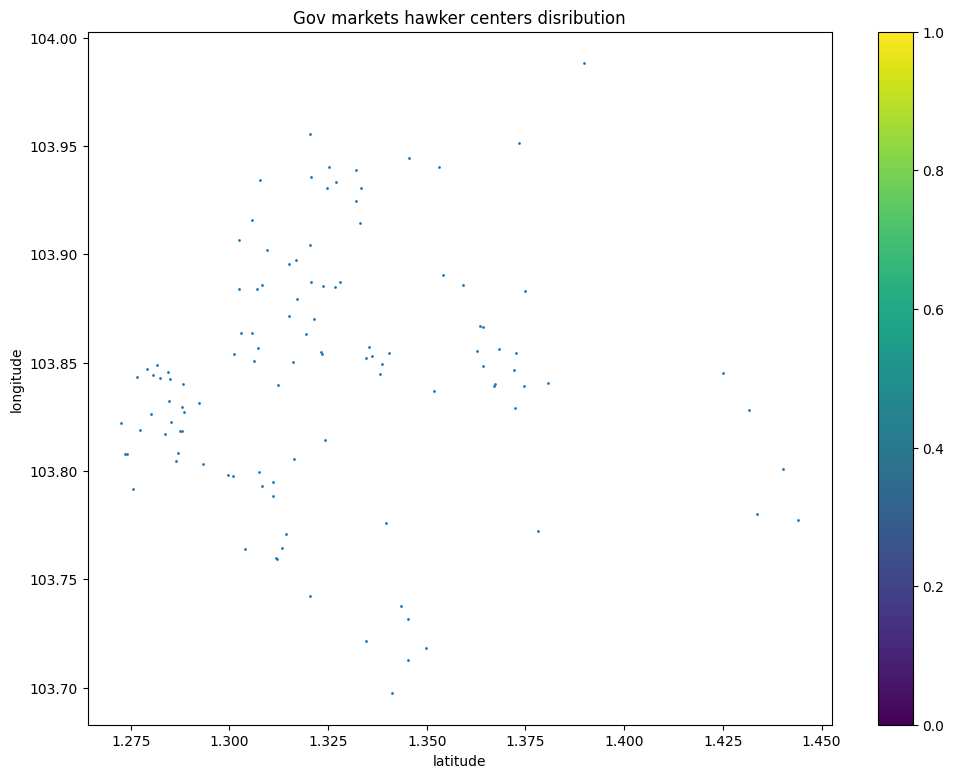

In [17]:
#plt.figure(figsize=(15, 10))
fig, ax = plt.subplots(figsize=(12, 9))
plt.scatter(gov_df['lat'], gov_df['lng'], s=1)
plt.colorbar()
plt.xlabel('latitude')
plt.ylabel('longitude')
plt.title('Gov markets hawker centers disribution')
plt.savefig('visual_gov_latlng.png')
plt.show()

## sg-primary-schools

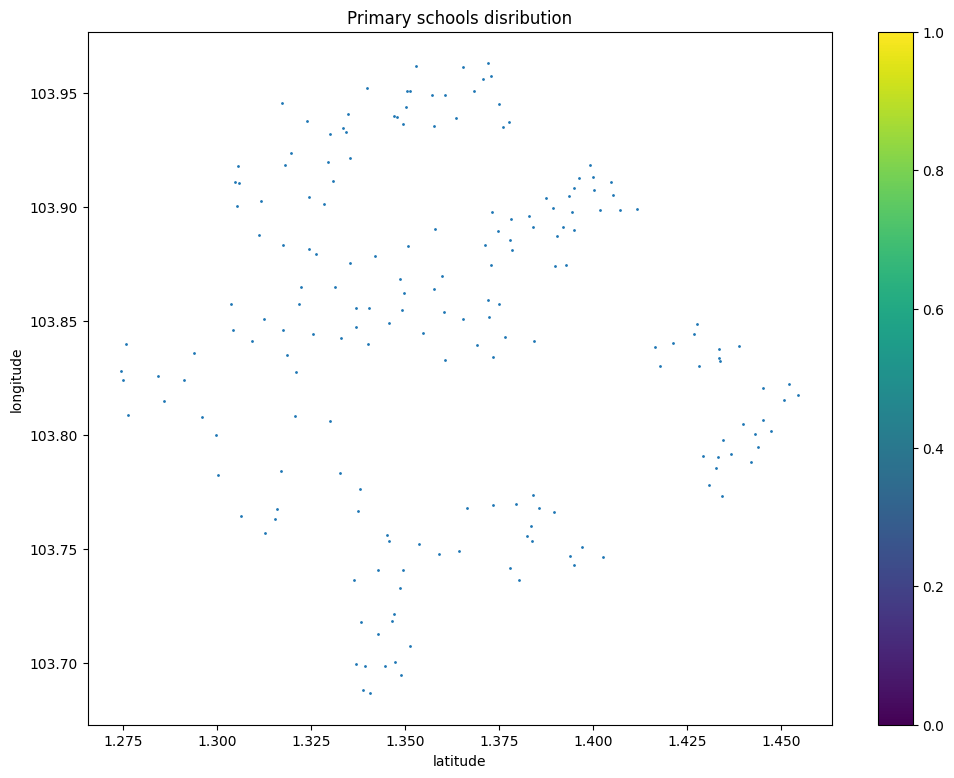

In [18]:
#plt.figure(figsize=(15, 10))
fig, ax = plt.subplots(figsize=(12, 9))
plt.scatter(primary_df['lat'], primary_df['lng'], s=1)
plt.colorbar()
plt.xlabel('latitude')
plt.ylabel('longitude')
plt.title('Primary schools disribution')
plt.savefig('visual_primary_latlng.png')
plt.show()

## sg-secondary-schools

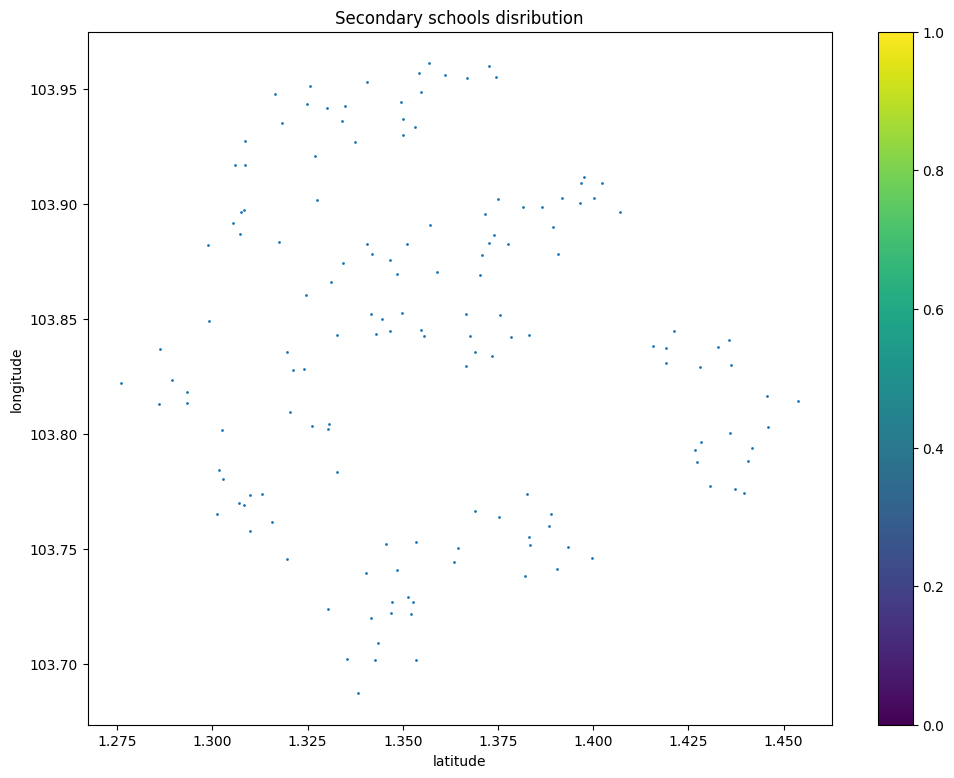

In [19]:
#plt.figure(figsize=(15, 10))
fig, ax = plt.subplots(figsize=(12, 9))
plt.scatter(secondary_df['lat'], secondary_df['lng'], s=1)
plt.colorbar()
plt.xlabel('latitude')
plt.ylabel('longitude')
plt.title('Secondary schools disribution')
plt.savefig('visual_secondary_latlng.png')
plt.show()

## sg-shopping-malls

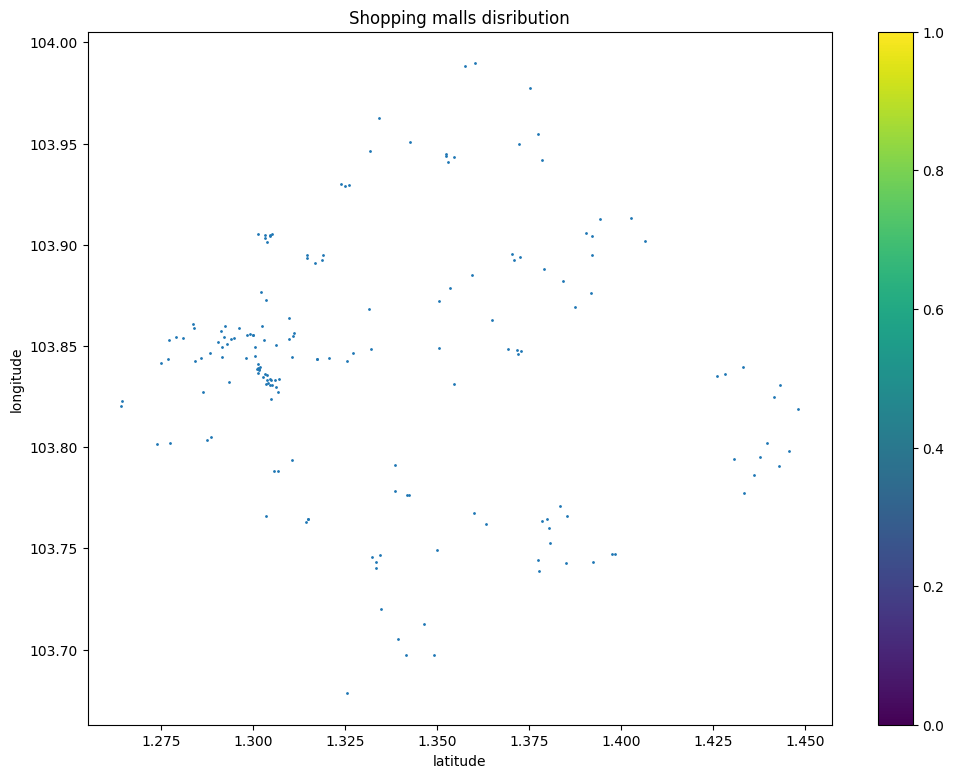

In [20]:
#plt.figure(figsize=(15, 10))
fig, ax = plt.subplots(figsize=(12, 9))
plt.scatter(shopping_df['lat'], shopping_df['lng'], s=1)
plt.colorbar()
plt.xlabel('latitude')
plt.ylabel('longitude')
plt.title('Shopping malls disribution')
plt.savefig('visual_shopping_latlng.png')
plt.show()

## sg-train-stations

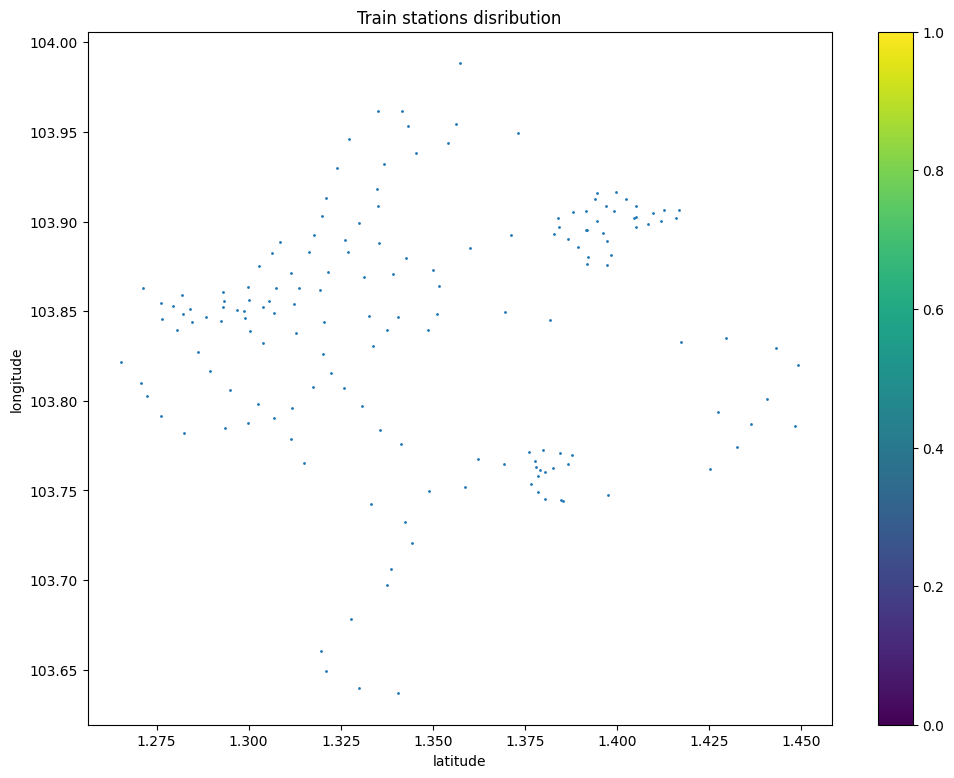

In [21]:
#plt.figure(figsize=(15, 10))
fig, ax = plt.subplots(figsize=(12, 9))
plt.scatter(train_df['lat'], train_df['lng'], s=1)
plt.colorbar()
plt.xlabel('latitude')
plt.ylabel('longitude')
plt.title('Train stations disribution')
plt.savefig('visual_train_latlng.png')
plt.show()